# Dictionaries

Key Features:

- **track_name:** Name of the song

- **artist(s)_name:** Name of the artist(s) of the song

- **artist_count:** Number of artists contributing to the song

- **released_year:** Year when the song was released

- **released_month:** Month when the song was released

- **released_day:** Day of the month when the song was released

- **in_spotify_playlists:** Number of Spotify playlists the song is included in

- **in_spotify_charts:** Presence and rank of the song on Spotify charts

- **streams:** Total number of streams on Spotify

- **in_apple_playlists:** Number of Apple Music playlists the song is included in

- **in_apple_charts:** Presence and rank of the song on Apple Music charts

- **in_deezer_playlists:** Number of Deezer playlists the song is included in

- **in_deezer_charts:** Presence and rank of the song on Deezer charts

- **in_shazam_charts:** Presence and rank of the song on Shazam charts

- **bpm:** Beats per minute, a measure of song tempo

- **key:** Key of the song

- **mode:** Mode of the song (major or minor)

- **danceability_%:** Percentage indicating how suitable the song is for dancing

- **valence_%:** Positivity of the song's musical content

- **energy_%:** Perceived energy level of the song

- **acousticness_%:** Amount of acoustic sound in the song

- **instrumentalness_%:** Amount of instrumental content in the song

- **liveness_%:** Presence of live performance elements

- **speechiness_%:** Amount of spoken words in the song

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import modeling tools
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

## Load Dataset

In [2]:
df = pd.read_csv('Data/spotify-2023_2.csv', encoding='latin-1')

In [3]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
## Display the number of columns and rows
df.shape
print(f'There are {df.shape [0]} rows and {df.shape [1]} columns in the dataset.')

There are 953 rows and 24 columns in the dataset.


## Data Cleaning

In [6]:
# Dropping unnecessary columns
columns_to_drop = ['mode', 'bpm', 'key']
df.drop(columns_to_drop, axis=1, inplace=True)

In [7]:
# viewing column info to verify the drop
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  danceability_%        953 non-null    int64 
 15  valence_%             953 non-null    in

### Duplicates

In [8]:
#Check for duplicates
print(f'There are {df.duplicated().sum()} duplicates.')

There are 0 duplicates.


### Missing Values

In [9]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 50 missing values.


In [10]:
# view missing values
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

- We would fix the missing values

In [11]:
# Checking nuniuqe categories
df.select_dtypes('object').nunique()

track_name             943
artist(s)_name         645
streams                949
in_deezer_playlists    348
in_shazam_charts       198
dtype: int64

In [12]:
# Check data types
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

- There looks to be a problem in our streams column. Let's check it out and fix it if need be.

In [13]:
df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',','')

# Fill NaN values with 0 in the 'in_shazam_charts' column
df['in_shazam_charts'].fillna(0, inplace=True)
# Convert the 'in_shazam_charts' column to integers
df['in_shazam_charts'] = df['in_shazam_charts'].astype(int)

# Convert the 'in_deezer_playlists' column to integers
df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',', '')
df['in_deezer_playlists'] = df['in_deezer_playlists'].astype(int)

In [14]:
# Remove non-numeric characters from the 'streams' column
df['streams'] = df['streams'].str.replace(r'\D', '', regex=True)

In [15]:
#Coverting streams into float
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

In [16]:
# verify our streams column was fixed

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    int64 
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    int64 
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      953 non-null    int64 
 14  danceability_%        953 non-null    int64 
 15  valence_%             953 non-null    in

In [17]:
# Check for impossible values
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.530000e+02,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,1.211250e+10,67.812172,51.908709,385.187828,2.666317,56.847849,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,3.580501e+11,86.441493,50.630241,1130.535561,6.035599,157.441749,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.417210e+08,13.000000,7.000000,13.000000,0.000000,0.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.908332e+08,34.000000,38.000000,44.000000,0.000000,2.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.740727e+08,88.000000,87.000000,164.000000,2.000000,33.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,1.105376e+13,672.000000,275.000000,12367.000000,58.000000,1451.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [18]:
# Check for impossible values for categorical columns
df.describe(include='object')

,track_name,artist(s)_name
count,953,953
unique,943,645
top,Daylight,Taylor Swift
freq,2,34


# EDA

In [28]:
top_artists = df['artist(s)_name'].value_counts().head(10)

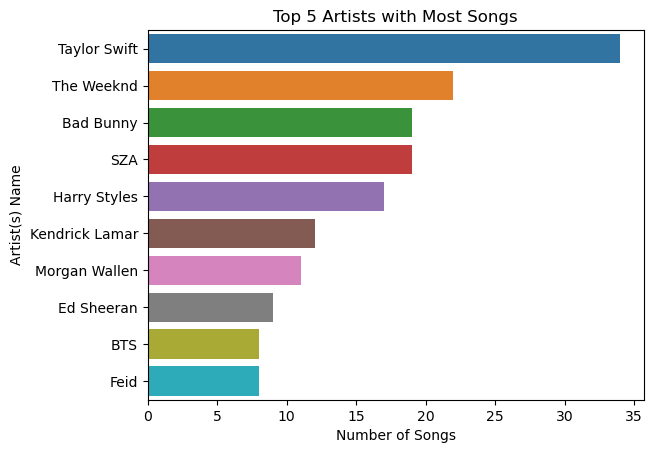

In [31]:
# using an sns countplot to show the the artist with the most songs/instrumentals
sns.barplot(x=top_artists.values, y=top_artists.index, data=df)
plt.xlabel('Number of Songs')
plt.ylabel('Artist(s) Name')
plt.title('Top 5 Artists with Most Songs');

- As seen in the above graph, Taylor Swift is leading the chart with 34 tracks
- Coming second place is the weeknd with 22 tracks
- Harry Styles takes fifth with 18
- BTS and Feid are both 9 & 10 respectively with 8 tracks
- Taylor Swift's numbers are increasingly high considering other artists are relatively close to each other or on the same level like Bad Bunny and SZA

In [22]:
# listing the top 10 most streamed songs 
most_streams = df[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(10)
most_streams

,track_name,artist(s)_name,streams
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,11053756970173
55,Blinding Lights,The Weeknd,3703895074
179,Shape of You,Ed Sheeran,3562543890
86,Someone You Loved,Lewis Capaldi,2887241814
620,Dance Monkey,Tones and I,2864791672
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2808096550
162,One Dance,"Drake, WizKid, Kyla",2713922350
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2665343922
140,Believer,Imagine Dragons,2594040133
725,Closer,"The Chainsmokers, Halsey",2591224264


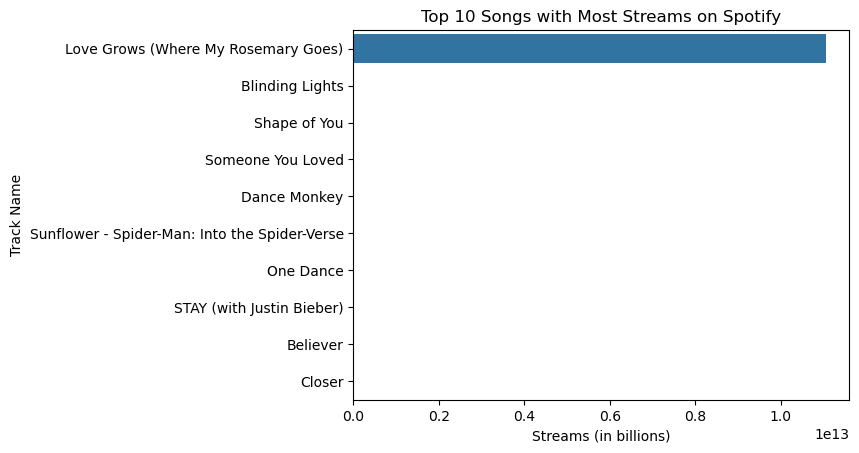

In [26]:
sns.barplot(x=most_streams['streams'], y=most_streams['track_name'])
plt.xlabel('Streams (in billions)')
plt.ylabel('Track Name')
plt.title('Top 10 Songs with Most Streams on Spotify');